<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/DBSCAN(crime_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving crime_data.csv to crime_data.csv


In [2]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("crime_data.csv");

print(df.head())


   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
stscaler = StandardScaler().fit(df)
X = stscaler.transform(df)

In [8]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [9]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

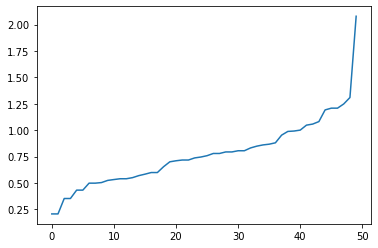

In [10]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [35]:
dbscan = DBSCAN(eps=1.25, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=1.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [36]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2])

In [37]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [38]:
cl

,cluster
0,0
1,-1
2,1
3,2
4,-1
5,1
6,2
7,2
8,-1
9,0


In [39]:
cl.value_counts()

cluster
 2         32
 1          7
-1          6
 0          5
dtype: int64

In [46]:
df1=pd.concat([df,cl],axis=1)

In [47]:
df1

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


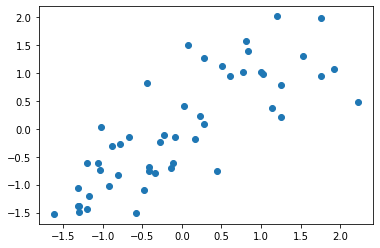

In [41]:
plt.scatter(X[:,0], X[:,1])

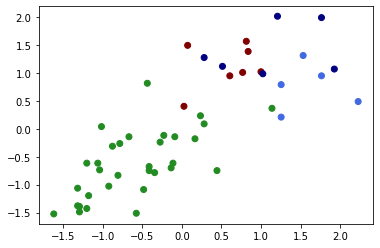

In [42]:
from matplotlib import pyplot as plt
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(dbscan.labels_))

In [48]:
#Grouping Data for predictions further 

result=df1.iloc[:,1:].groupby(df1.cluster).mean()

In [49]:
result

,Assault,UrbanPop,Rape,cluster
cluster,,,,
-1,287.000,64.833333,32.700000,-1
0,232.600,58.200000,23.720000,0
1,263.000,76.857143,30.685714,1
2,119.125,64.343750,16.625000,2
